# K-Nearest Neighbours (Diabetes Prediction)

## Penjelasan Kolom:
- Pregnancies: Jumlah kehamilan yang pernah dialami pasien.
- Glucose: Konsentrasi glukosa dalam darah.
- BloodPressure: Tekanan darah diastolik pasien (mm Hg).
- SkinThickness: Ukuran ketebalan lipatan kulit (mm) untuk melihat kadar lemak tubuh.
- Insulin: Kadar insulin dalam darah (mu U/ml).
- BMI: Body Mass Index (kg/m²), untuk mengukur tingkat berat badan ideal.
- DiabetesPedigreeFunction: Nilai probabilitas genetik yang menunjukkan pengaruh riwayat diabetes dalam keluarga.
- Age: Usia pasien, karena semakin tua risiko diabetes meningkat.
- Outcome: Kolom target yang menunjukkan apakah pasien terindikasi diabetes atau tidak.
Nilai 1 berarti terdiagnosis diabetes, dan 0 berarti tidak.

### A. Data Preparation

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
try:
    df = pd.read_csv('diabetes.csv')
    print("berhasil membaca data")
except Exception as e:
    print("Gagal membaca data")
    

berhasil membaca data


In [3]:
df.shape

(768, 9)

In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

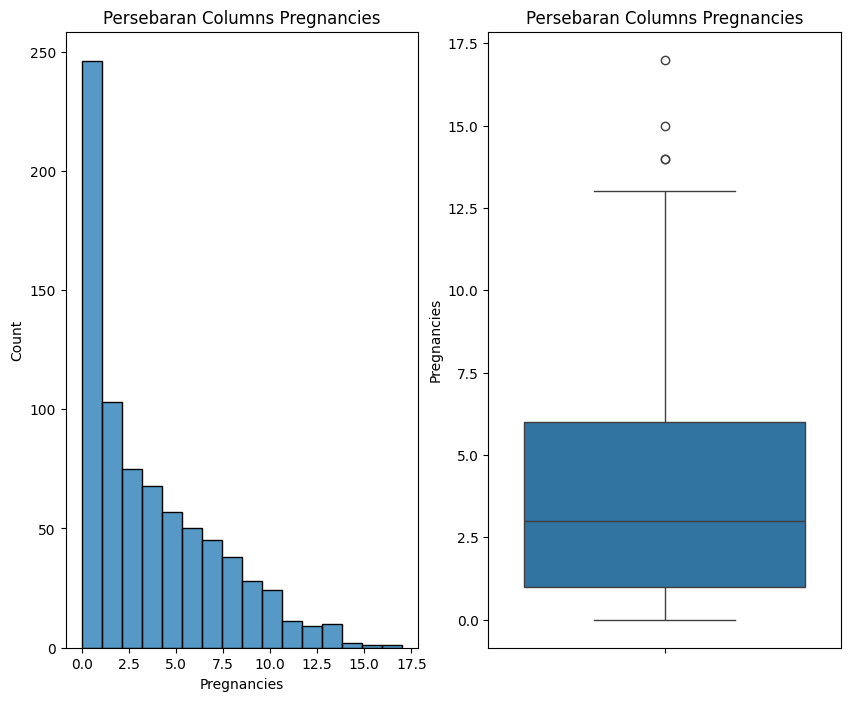

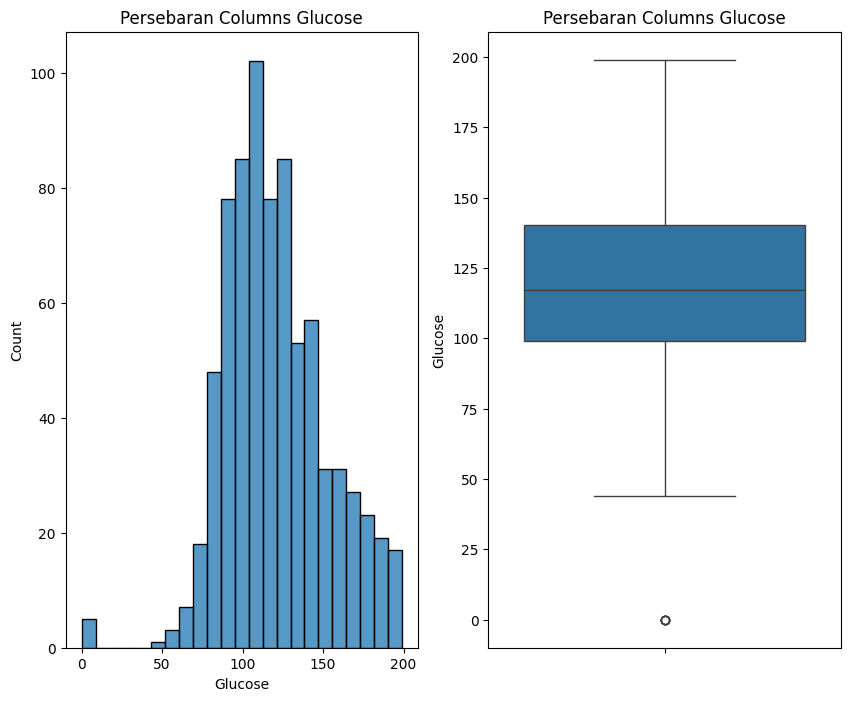

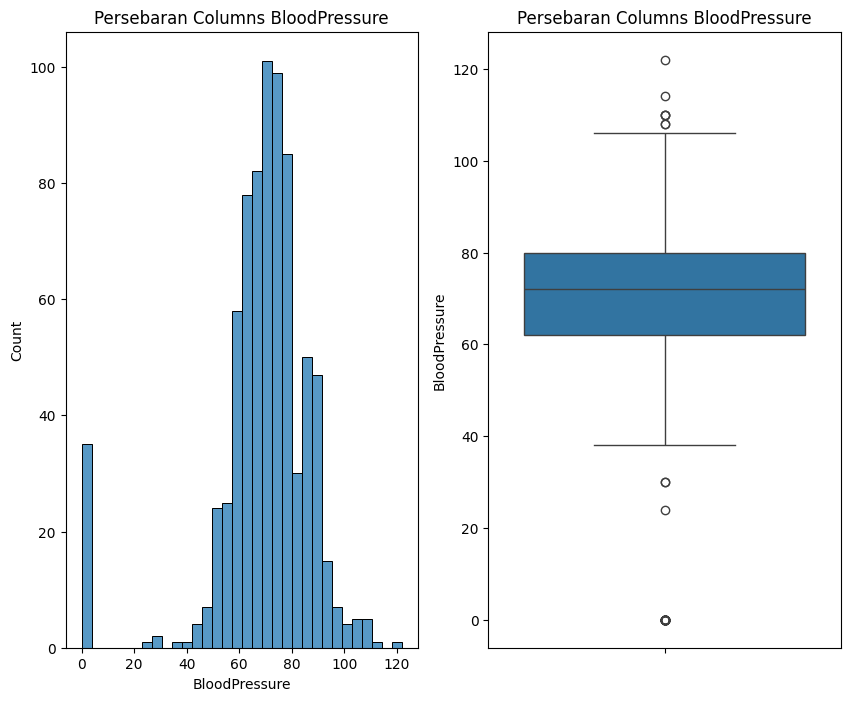

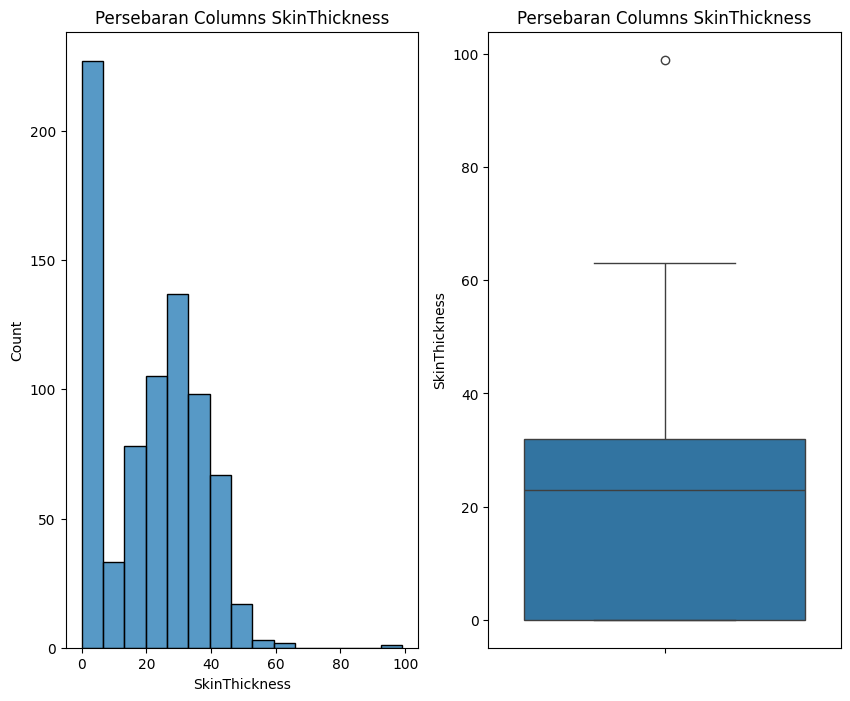

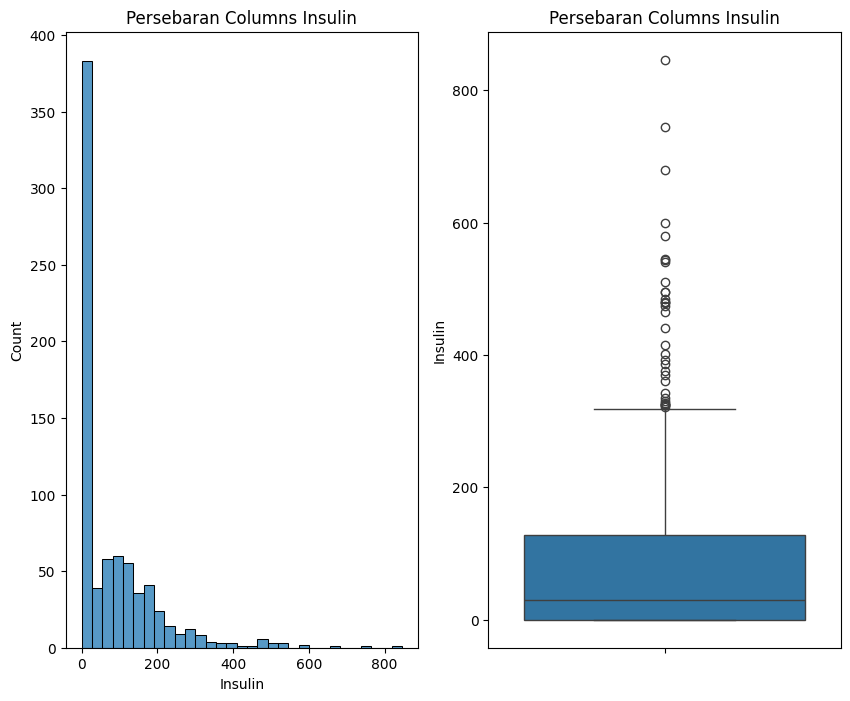

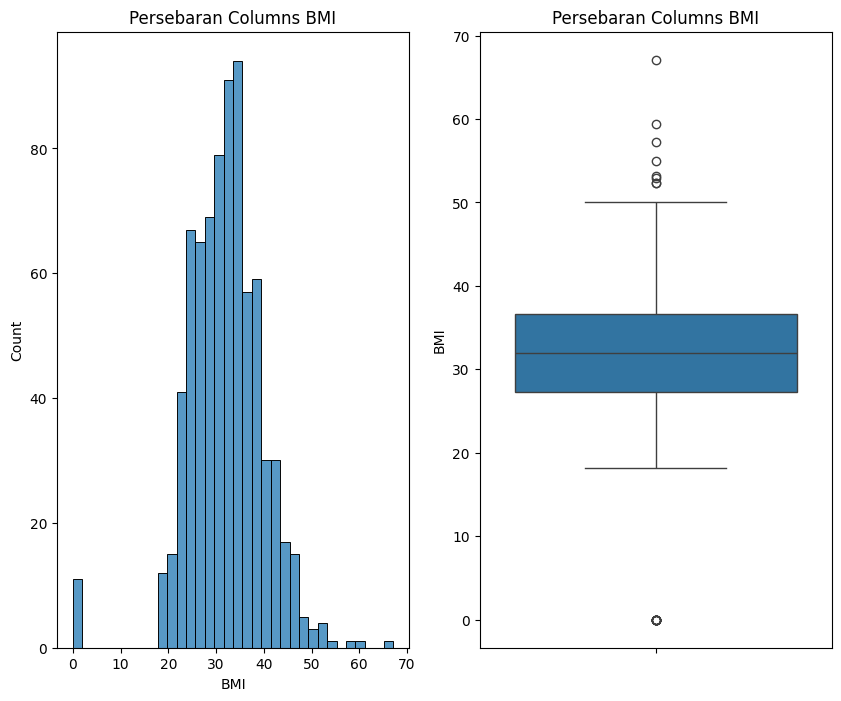

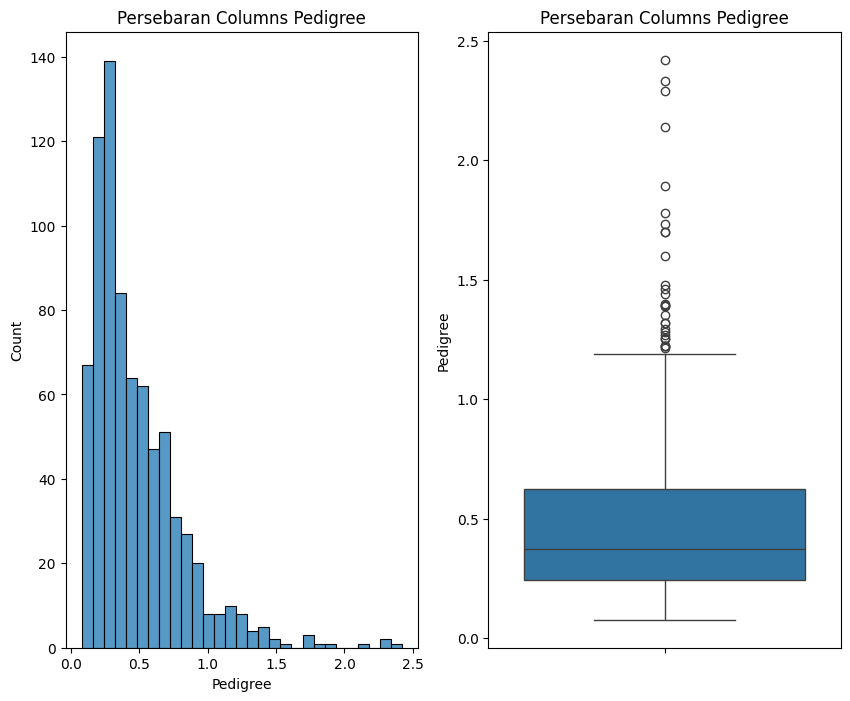

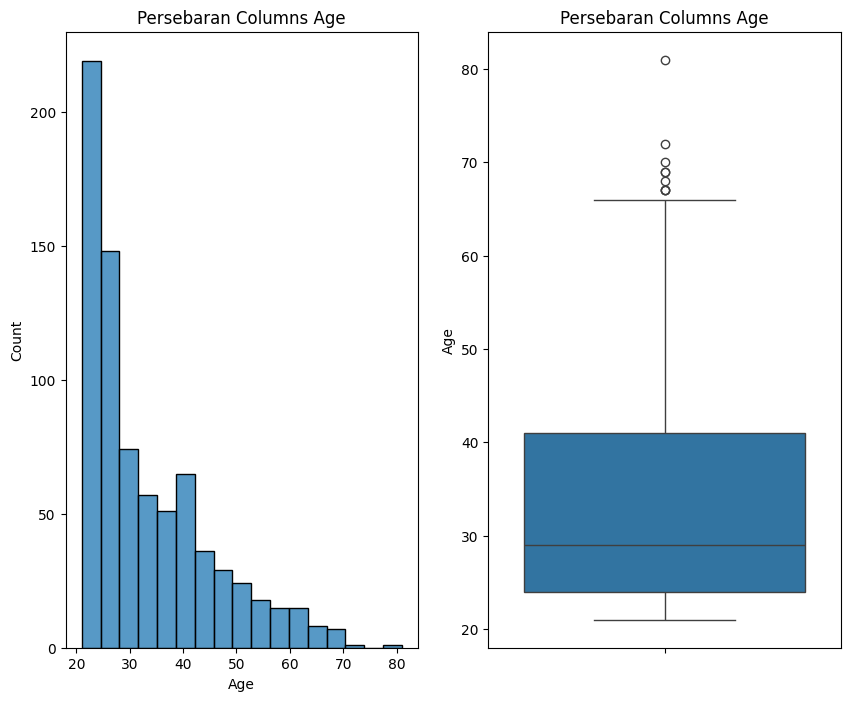

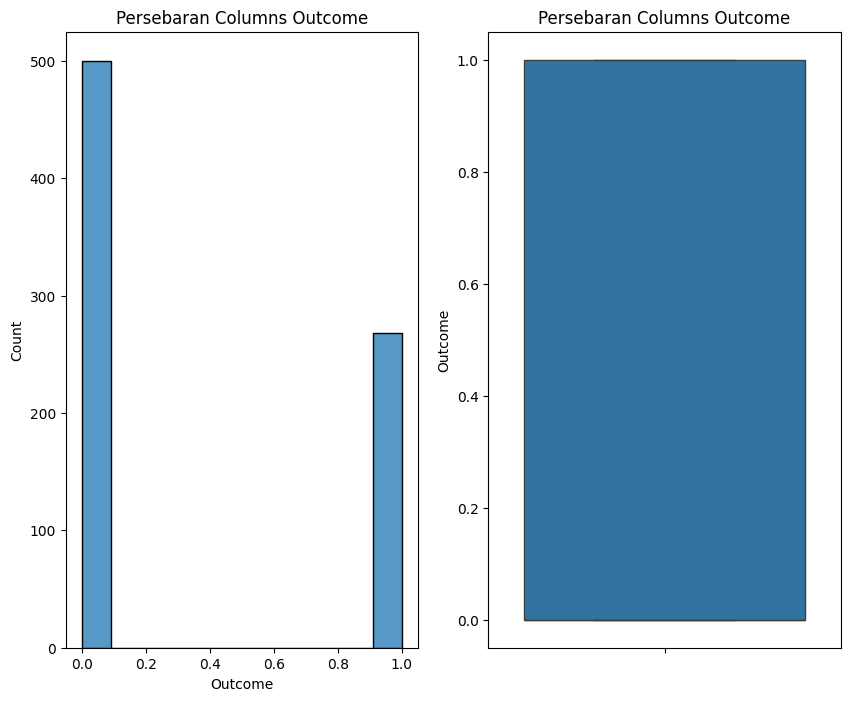

In [8]:
for col in df:
    fig, axes = plt.subplots(1,2, figsize=(10, 8))
    sns.histplot(df[col], ax=axes[0])
    axes[0].set_title(f"Persebaran Columns {col}")
    
    sns.boxplot(df[col], ax=axes[1])
    axes[1].set_title(f"Persebaran Columns {col}")

In [9]:
df.describe().T.style.format("{:.2f}").background_gradient(cmap='coolwarm')

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.00,3.85,3.37,0.00,1.00,3.00,6.00,17.00
Glucose,768.00,120.89,31.97,0.00,99.00,117.00,140.25,199.00
BloodPressure,768.00,69.11,19.36,0.00,62.00,72.00,80.00,122.00
SkinThickness,768.00,20.54,15.95,0.00,0.00,23.00,32.00,99.00
Insulin,768.00,79.80,115.24,0.00,0.00,30.50,127.25,846.00
BMI,768.00,31.99,7.88,0.00,27.30,32.00,36.60,67.10
Pedigree,768.00,0.47,0.33,0.08,0.24,0.37,0.63,2.42
Age,768.00,33.24,11.76,21.00,24.00,29.00,41.00,81.00
Outcome,768.00,0.35,0.48,0.00,0.00,0.00,1.00,1.00


### B. Data Preprocessing

In [10]:
df['Pedigree'] = df['Pedigree'].clip(0.08, 1.5)

In [11]:
df['Pregnancies'] = df['Pregnancies'].clip(0.0, 15.5)

In [12]:
df['Glucose'] = df['Glucose'].clip(40, 200)

In [13]:
df['BloodPressure'] = df['BloodPressure'].clip(20, 120)

In [14]:
df['SkinThickness'] = df['SkinThickness'].clip(0.0, 65)

In [15]:
df['Insulin'] = df['Insulin'].clip(0.0, 600)

In [16]:
df['BMI'] = df['BMI'].clip(18, 60)

In [17]:
df['Age'] = df['Age'].clip(20, 80)

In [18]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [19]:
clean = df.copy()

In [20]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

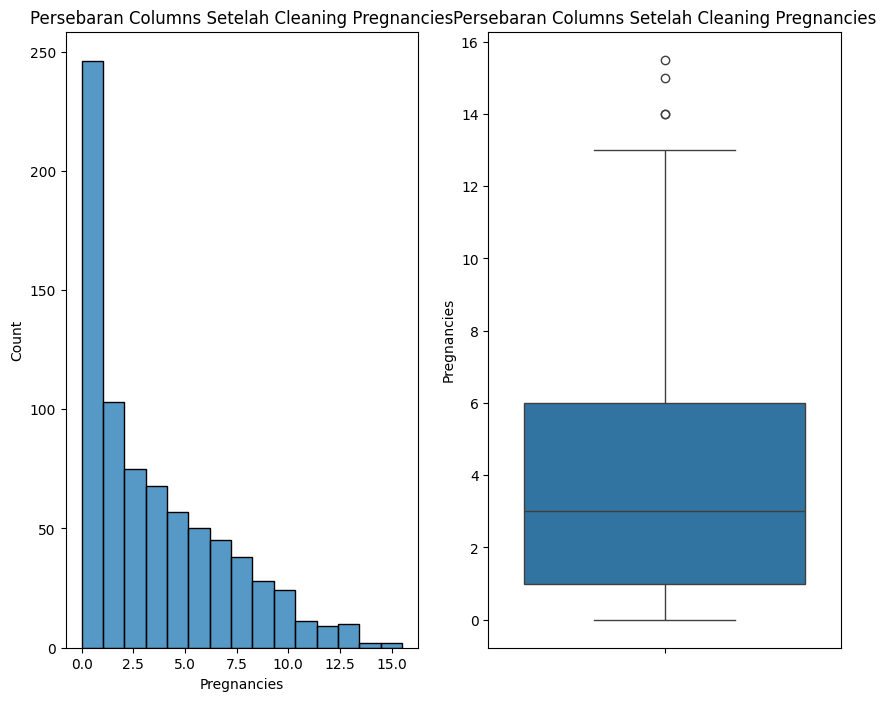

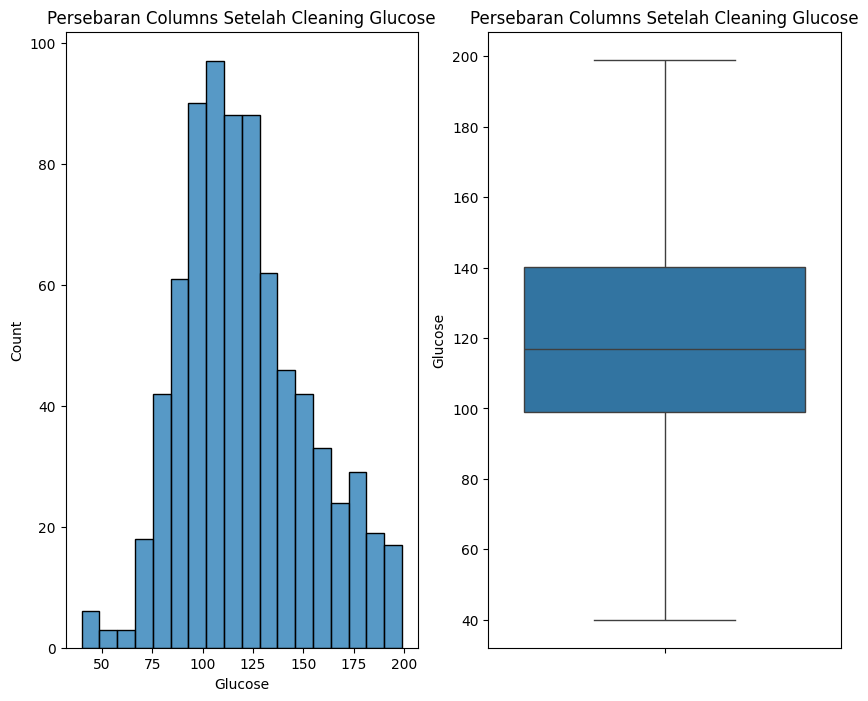

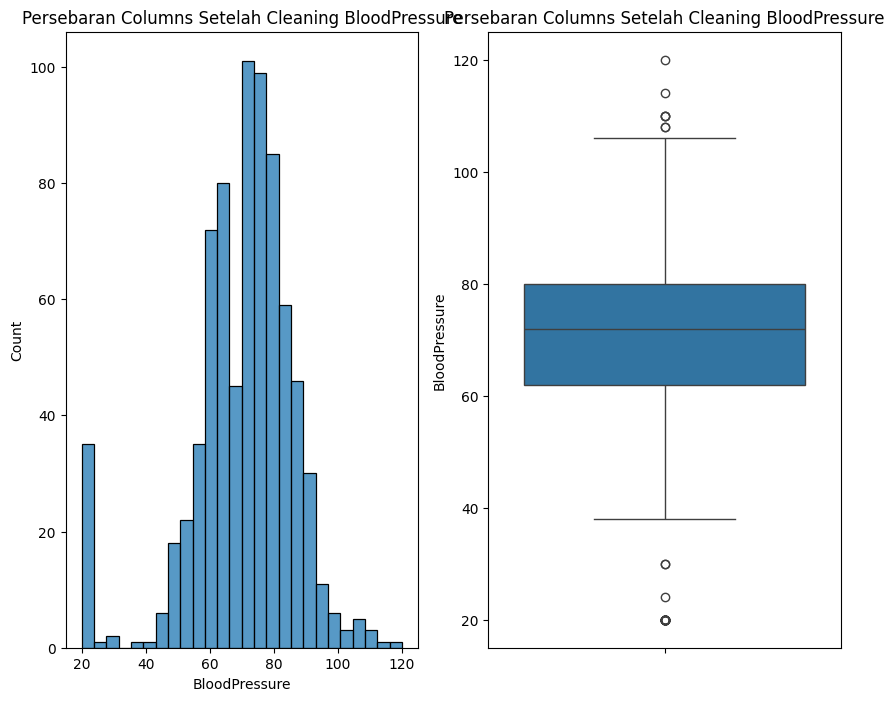

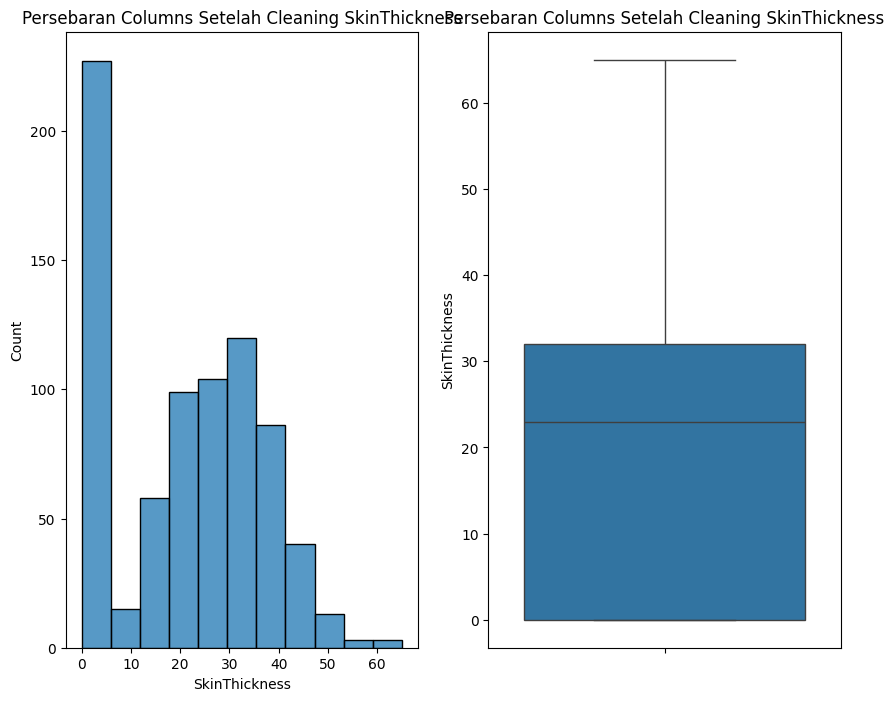

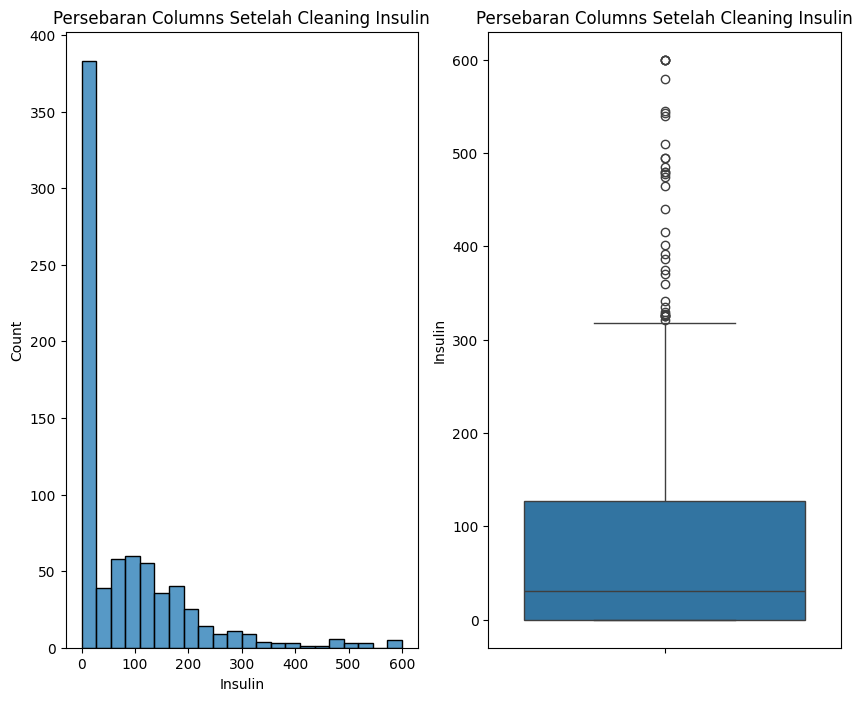

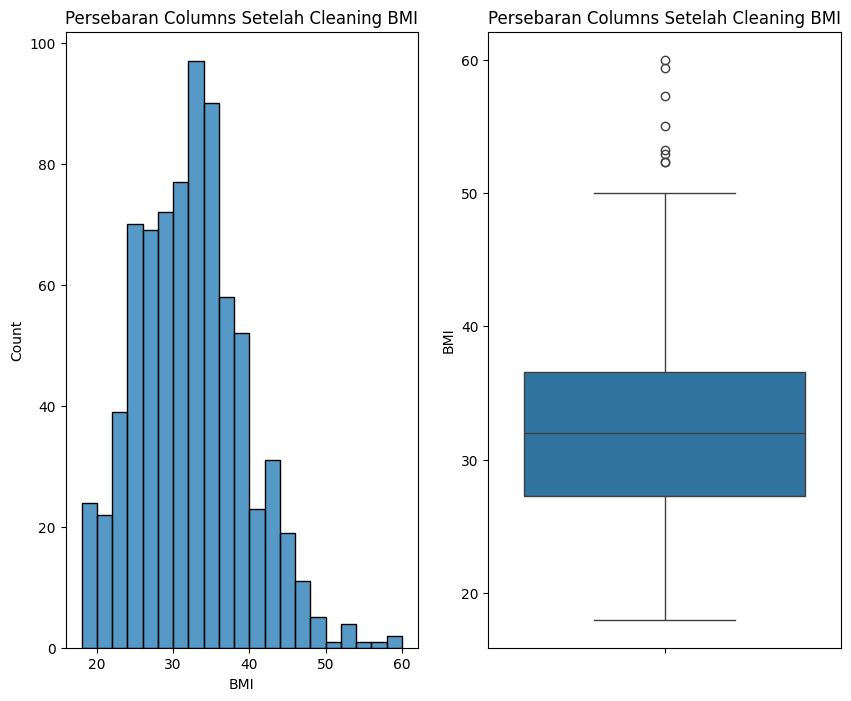

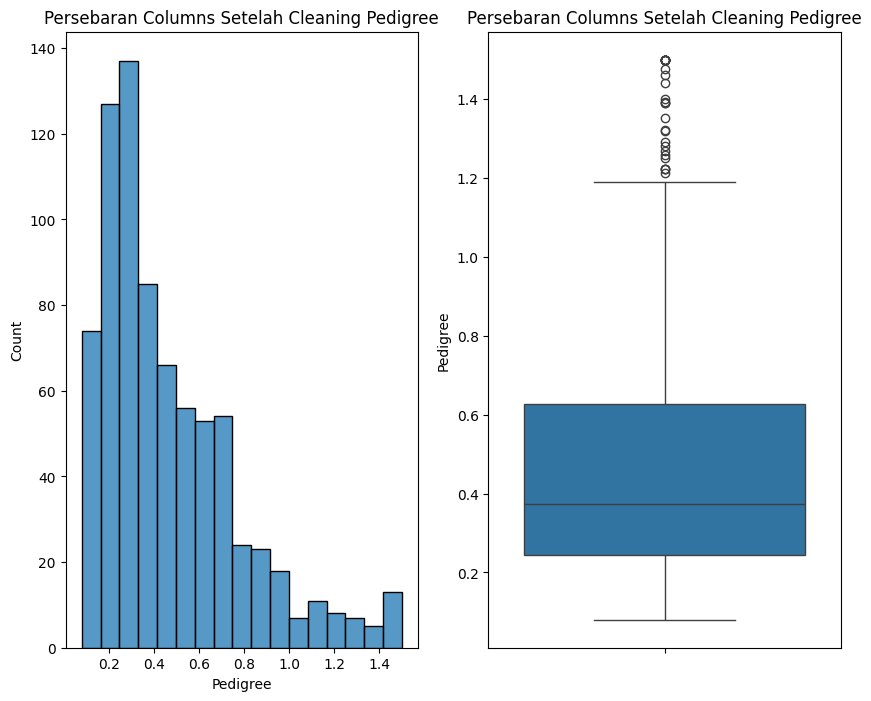

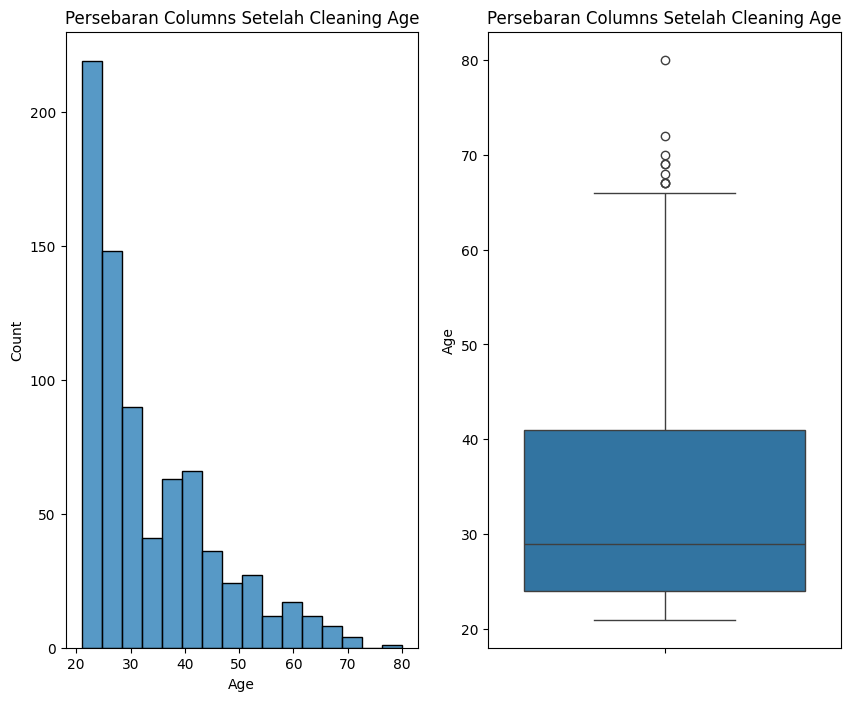

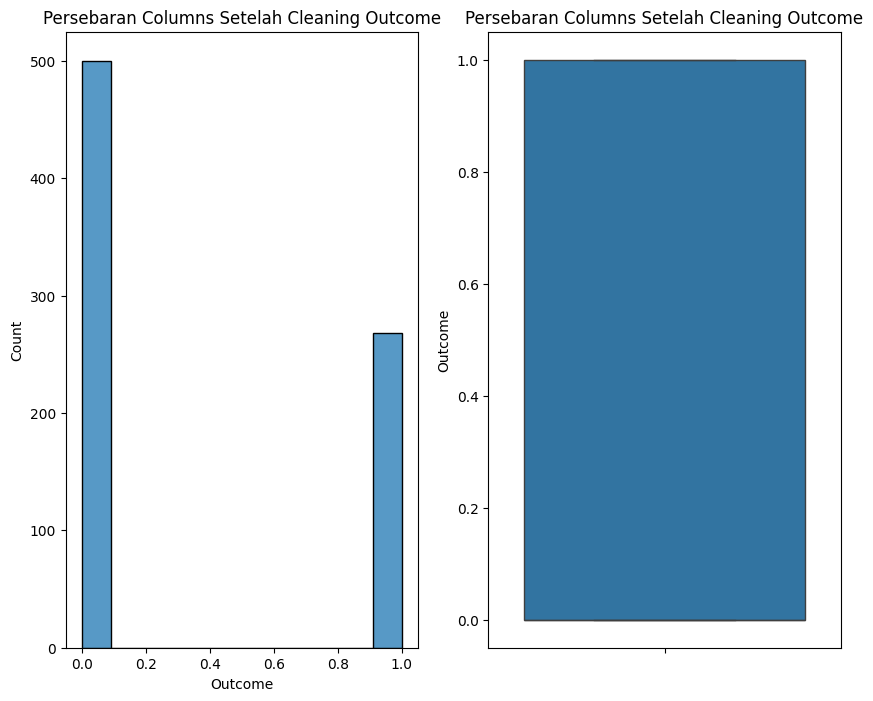

In [21]:
for col in clean:
    fig, axes = plt.subplots(1,2, figsize=(10, 8))
    sns.histplot(clean[col], ax=axes[0])
    axes[0].set_title(f"Persebaran Columns Setelah Cleaning {col}")
    
    sns.boxplot(clean[col], ax=axes[1])
    axes[1].set_title(f"Persebaran Columns Setelah Cleaning {col}")

### C. Exploratory Data Analysis (EDA)

In [22]:
clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    float64
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(3), int64(6)
memory usage: 54.1 KB


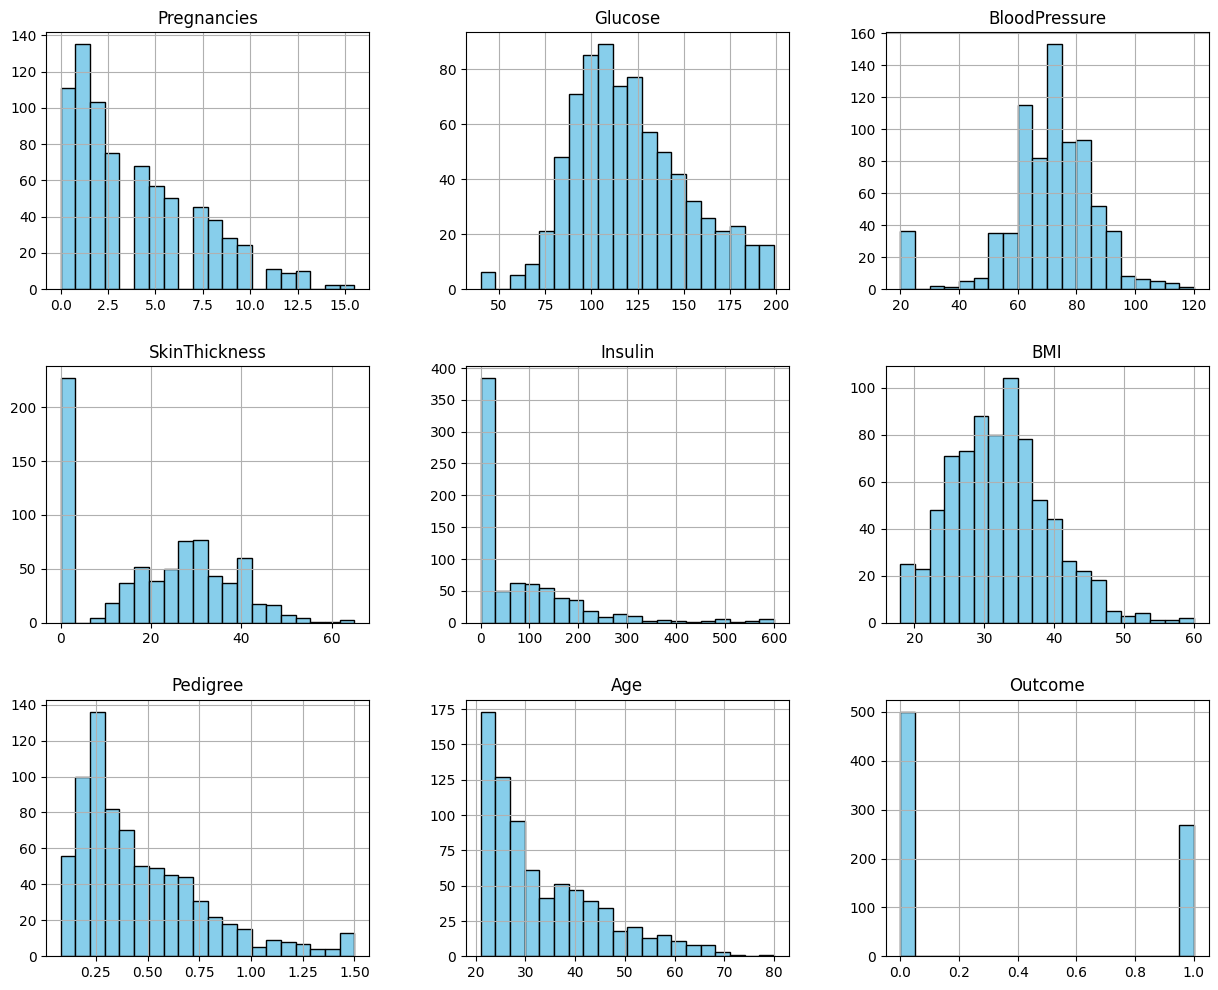

In [23]:
clean.hist(bins=20, figsize=(15, 12), color='skyblue', edgecolor='black')
plt.show()

In [24]:
clean.skew()

Pregnancies      0.885391
Glucose          0.430874
BloodPressure   -1.024422
SkinThickness   -0.010026
Insulin          1.996073
BMI              0.446691
Pedigree         1.319728
Age              1.126049
Outcome          0.635017
dtype: float64

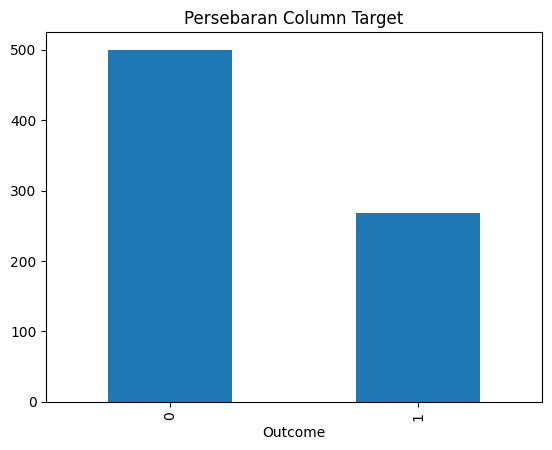

In [25]:
clean['Outcome'].value_counts().plot(kind='bar').set_title("Persebaran Column Target")
plt.show()

In [26]:
clean['Outcome'].value_counts(normalize=True) * 100

Outcome
0    65.104167
1    34.895833
Name: proportion, dtype: float64

In [27]:
# plt.figure(figsize=(5, 5))
# sns.pairplot(clean, hue='Outcome')
# plt.show()

In [28]:
clean.corr().T.style.format("{:.2f}").background_gradient(cmap='coolwarm')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
Pregnancies,1.00,0.13,0.16,-0.08,-0.07,0.02,-0.02,0.54,0.22
Glucose,0.13,1.00,0.18,0.06,0.33,0.23,0.13,0.27,0.48
BloodPressure,0.16,0.18,1.00,0.18,0.07,0.26,0.04,0.27,0.09
SkinThickness,-0.08,0.06,0.18,1.00,0.45,0.40,0.18,-0.12,0.07
Insulin,-0.07,0.33,0.07,0.45,1.00,0.20,0.17,-0.05,0.13
BMI,0.02,0.23,0.26,0.40,0.20,1.00,0.14,0.03,0.31
Pedigree,-0.02,0.13,0.04,0.18,0.17,0.14,1.00,0.04,0.18
Age,0.54,0.27,0.27,-0.12,-0.05,0.03,0.04,1.00,0.24
Outcome,0.22,0.48,0.09,0.07,0.13,0.31,0.18,0.24,1.00


<Axes: >

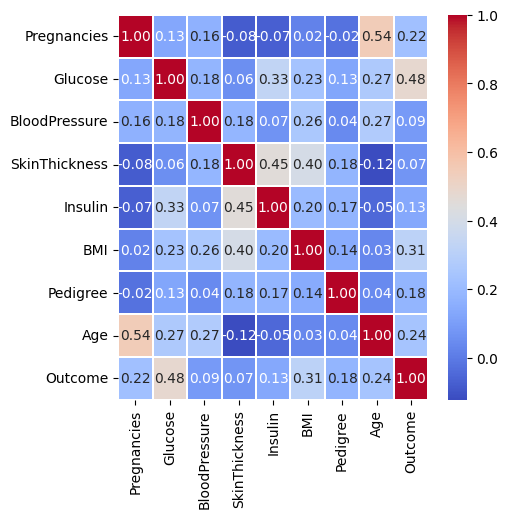

In [29]:
plt.figure(figsize=(5, 5))
sns.heatmap(clean.corr(),
            annot= True,
            fmt=".2f",
            cmap='coolwarm',
            linewidths=1.1)

In [30]:
clean_major = clean[clean['Outcome'] == 0]
clean_minor = clean[clean['Outcome'] == 1]

In [31]:
target_outcome = len(clean_major)

In [32]:
clean_minor_oversampled = clean_minor.sample(n=target_outcome, replace=True, random_state=42)

In [33]:
clean_final = pd.concat([clean_major, clean_minor_oversampled])

In [34]:
clean_final['Outcome'].value_counts()

Outcome
0    500
1    500
Name: count, dtype: int64

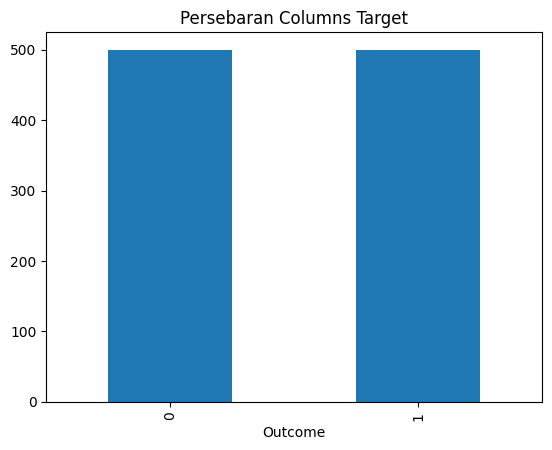

In [35]:
clean_final['Outcome'].value_counts().plot(kind='bar').set_title("Persebaran Columns Target")
plt.show()

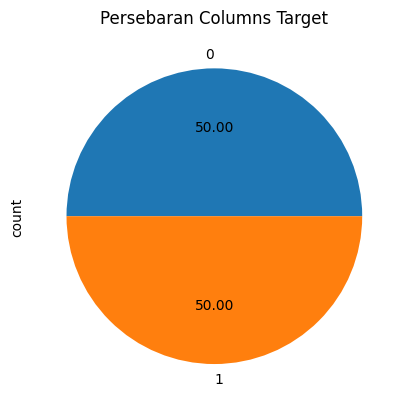

In [36]:
clean_final['Outcome'].value_counts().plot(kind='pie', autopct='%.2f').set_title("Persebaran Columns Target")
plt.show()

In [37]:
clean_final.shape

(1000, 9)

### D. Normalisasi

In [38]:
feature = clean_final.drop(columns=['Outcome'])
target = clean_final['Outcome']

In [39]:
clean_final_minmax = (feature - feature.min()) / (feature.max() - feature.min())

In [40]:
clean_final_norm = pd.concat([clean_final_minmax, target], axis=1) 

In [41]:
clean_final_norm.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
1,0.064516,0.283019,0.46,0.460317,0.000000,0.204762,0.190845,0.169492,0
3,0.064516,0.308176,0.46,0.365079,0.156667,0.240476,0.061268,0.000000,0
5,0.322581,0.477987,0.54,0.000000,0.000000,0.180952,0.085211,0.152542,0
7,0.645161,0.471698,0.00,0.000000,0.000000,0.411905,0.038028,0.135593,0
10,0.258065,0.440252,0.72,0.000000,0.000000,0.466667,0.078169,0.152542,0


### E. Modelling (KNN)

In [42]:
clean_final_norm.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age', 'Outcome'],
      dtype='object')

In [43]:
X = clean_final_norm[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'Pedigree', 'Age']]
y = clean_final_norm['Outcome']

In [44]:
def stratified_split_data(X, y, train_size=0.8, random_state=42, frac=None):
    np.random.seed(random_state)
    
    if frac:
        X = X.sample(frac=frac, random_state=random_state)
        y = y.loc[X.index]
        
    X_train_list, X_test_list = [], []
    y_train_list, y_test_list = [], []
    
    for class_value in np.unique(y):
        class_idx = np.where(y == class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)
        
        X_train_list.append(X.iloc[idx[:split_ratio]])
        X_test_list.append(X.iloc[idx[split_ratio:]])
        y_train_list.append(y.iloc[idx[:split_ratio]])
        y_test_list.append(y.iloc[idx[split_ratio:]])
        
    X_train = pd.concat(X_train_list).reset_index(drop=True)
    X_test = pd.concat(X_test_list).reset_index(drop=True)
    y_train = pd.concat(y_train_list).reset_index(drop=True)
    y_test = pd.concat(y_test_list).reset_index(drop=True)
    
    return X_train, X_test, y_train, y_test

X_train, X_test, y_train, y_test = stratified_split_data(X, y )

In [45]:
class KNN:
    def __init__(self, k=3):
        self.K = k
    
    def train(self, X, y):
        self.X_train = X
        self.y_train = y
        
    def predict(self, X):
        y_prediksi = [self._prediksi(x) for x in X]
        return np.array(y_prediksi)
    
    def _prediksi(self, x):
        #1 Hitung Jarak kesemua data training
        jarak_titik = [self.jarak(x,x_train) for x_train in self.X_train]
        #2 Urutkan berdasarkan jarak terdekat, ambil sejumlah K
        k_terbaik = np.argsort(jarak_titik)[:self.K]
        #3 Ambil label k_terbaik
        label_k_terbaik = [self.y_train[i] for i in k_terbaik]
        #4 Voting yang paling banyak
        hasil_voting = max(set(label_k_terbaik), key=label_k_terbaik.count)
        return hasil_voting
        
    def jarak(self, x1, x2): 
        return np.sqrt(np.sum((x1-x2)**2))
            

### F. Evaluasi Model

In [46]:
model = KNN(k=3)
model.train(X_train.values, y_train.values)
hasil = model.predict(X_test.values)
print(hasil)

[0 1 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 0 0
 0 0 0 1 0 0 0 0 1 1 1 1 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 0 0 0
 1 0 0 0 0 1 0 1 0 1 1 0 1 1 1 0 0 0 0 0 0 0 1 1 1 0 0 0 1 1 1 1 1 1 0 1 1
 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 1 1
 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [47]:
akurasi = np.sum(hasil == y_test)/len(X_test)
print(akurasi)

0.78


In [48]:
hasil_train = model.predict(X_train.values)

In [49]:

akurasi_latih = np.sum(hasil_train == y_train)/len(X_train)
print(akurasi_latih)

0.88625


In [50]:
def confusion_matrix(y_test, y_prediksi):
    TP = 0
    FP = 0
    FN = 0
    TN = 0
    
    for asli, tebak in zip(y_test, y_prediksi):
        if asli == 1 and tebak == 1: TP += 1
        elif asli == 0 and tebak == 1: FP += 1
        elif asli == 1 and tebak == 0: FN += 1
        elif asli == 0 and tebak == 0: TN += 1
    
    return np.array([[TN, FP], [FN, TP]])

In [51]:

cm = confusion_matrix(y_test, hasil)
TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[0][0]

precision = TP / (TP + FP)
print(precision)

0.7413793103448276


In [52]:
cm = confusion_matrix(y_test, hasil)
TP = cm[1][1]
FP = cm[0][1]
FN = cm[1][0]
TN = cm[0][0]

recall = TP / (TP + FN)
print(recall)

0.86


In [53]:
fscore = 2*(precision*recall / precision+recall)
print(fscore)

3.44


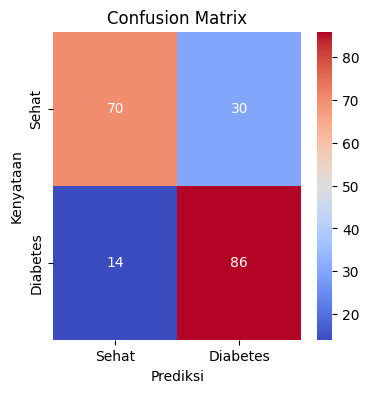

In [54]:
cm = confusion_matrix(y_test, hasil)

plt.figure(figsize=(4,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='coolwarm', xticklabels=['Sehat', 'Diabetes'], yticklabels=['Sehat', 'Diabetes'])
plt.xlabel("Prediksi")
plt.ylabel("Kenyataan")
plt.title("Confusion Matrix")
plt.show()

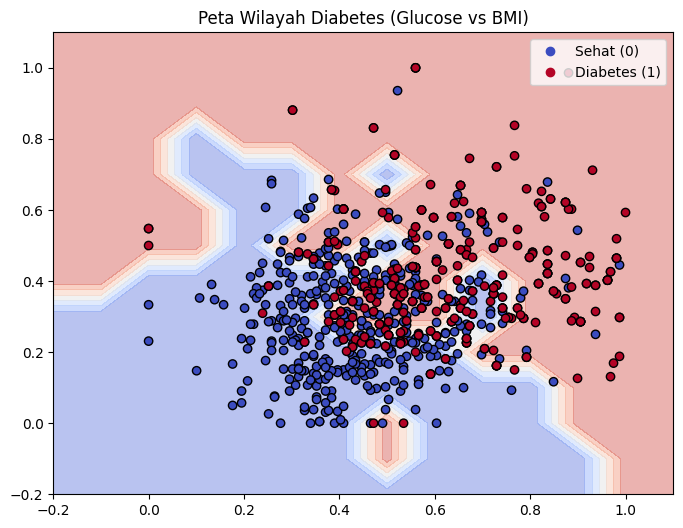

In [55]:
# --- STEP 1: SIAPIN DATA (Cuma butuh 2 kolom) ---
# Kita ambil Glucose (1) dan BMI (5)
X_mini = X_train.values[:, [1, 5]] 
y_mini = y_train.values

# Latih ulang model KNN khusus visualisasi ini
model_vis = KNN(k=3)
model_vis.train(X_mini, y_mini)

# --- STEP 2: BIKIN LANTAI / JARING (Grid) ---
# Ambil batas minimum dan maksimum biar grafiknya pas
x_min, x_max = X_mini[:, 0].min() - 0.2, X_mini[:, 0].max() + 0.2
y_min, y_max = X_mini[:, 1].min() - 0.2, X_mini[:, 1].max() + 0.2

# Bikin ribuan titik koordinat (Hafalin aja mantra 'meshgrid' ini)
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

# --- STEP 3: PREDIKSI (Warnain Lantai) ---
# np.c_ = gabungin koodinat X dan Y
Z = model_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape) # Wajib balikin bentuknya ke kotak

# --- STEP 4: GAMBAR --
plt.figure(figsize=(8, 6))

# Gambar Lantai Wilayah (Pake warna standar 'coolwarm' biar gampang: Merah/Biru)
plt.contourf(xx, yy, Z, cmap='coolwarm', alpha=0.4)

# Gambar Titik Asli
gambar = plt.scatter(X_mini[:, 0], X_mini[:, 1], c=y_mini, cmap='coolwarm', edgecolors='black')

plt.title('Peta Wilayah Diabetes (Glucose vs BMI)')
plt.legend(handles= gambar.legend_elements()[0], labels=['Sehat (0)', 'Diabetes (1)'], loc="upper right")
plt.show()

Kesimpulan:
Kami awalnya meng-clip nilai yang melewati batas maksimal, ternyata setelah konsultasi bersama Mentor, data tersebut bisa jadi data asli, dikarenakan tidak terlalu jauh diatas batas maksimal. Dan benar saja saat kami mencoba saran dari Mentor, hasil akurasi model meningkat dari sebelumnya.